# Inside Airbnb Data project

## Analysis by JayChen AQ-6666

Welcome to my Inside Airbnb data project. The data was complied by 10 July, 2019. According to this airbnb data i want to provide a question. An overseas immigration bought some apartments in Sydney. He wants to set up homes on Airbnb. So He wants to have a preliminary understanding by this table. Learn about the price and distribution of Sydney’s homestay.

In [10]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('listings.csv' ,encoding ='ISO-8859-1', low_memory=False)

## Loading the csv file

In [12]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,65,...,2019/4/24,1.58,1,354,NaN,NaN,NaN,NaN,NaN,NaN
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.1919,Private room,14316,...,2019/6/29,4.73,2,19,NaN,NaN,NaN,NaN,NaN,NaN
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,...,2019/1/2,0.05,2,99,NaN,NaN,NaN,NaN,NaN,NaN
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.88045,151.21654,Private room,110,...,2019/5/23,3.6,3,336,NaN,NaN,NaN,NaN,NaN,NaN
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.85907,151.17275,Entire home/apt,450,...,2019/1/3,0.17,1,142,NaN,NaN,NaN,NaN,NaN,NaN
5,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,NaN,Woollahra,-33.88909,151.2594,Private room,62,...,2019/3/29,0.45,1,181,NaN,NaN,NaN,NaN,NaN,NaN
6,38073,Modern apartment with pool and parking,103476,Prasanna,NaN,North Sydney,-33.83443,151.20887,Entire home/apt,159,...,2017/9/16,0.6,2,187,NaN,NaN,NaN,NaN,NaN,NaN
7,39348,Large Bondi studio,168828,Marie,NaN,Waverley,-33.88482,151.28295,Entire home/apt,85,...,2019/1/4,0.67,1,8,NaN,NaN,NaN,NaN,NaN,NaN
8,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87996,151.21553,Entire home/apt,130,...,2019/3/20,0.56,1,52,NaN,NaN,NaN,NaN,NaN,NaN
9,57183,BONDI BEACHFRONT CENTRAL LOCATION,1623151,Susan,NaN,Waverley,-33.89185,151.27308,Entire home/apt,174,...,2019/6/20,1.24,1,94,NaN,NaN,NaN,NaN,NaN,NaN


## Coordinate distribution

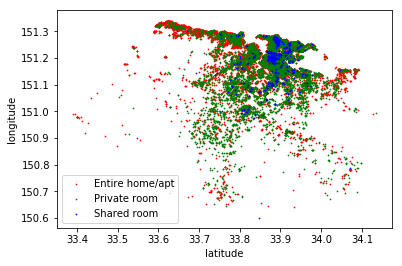

In [13]:
import pandas as pd
df = pd.read_csv('listings.csv' ,encoding ='ISO-8859-1', low_memory=False)
df_need=df[['latitude','longitude','room_type','neighbourhood']]
df_need.dropna()
list_neighbourhood=[]
import numpy as np
list_need = np.array(df_need)
list_true=[]
num=0
for i in range(list_need.shape[0]):
    if not isinstance (list_need[i,0],float):
        if not isinstance (list_need[i,1],float):
            if list_need[i,0].replace('.','').replace('-','').isdigit():
                if list_need[i,1].replace('.','').replace('-','').isdigit():
                    if ('Entire home/apt' in list_need[i,2]) or ('Private room' in list_need[i,2]) or ('Shared room' in list_need[i,2]) :
                        if isinstance(list_need[i,3],str) :
                            if list_need[i,3].replace(' ','').replace('-','').isalpha():
                                list_true.append(list_need[i])
list_true = np.array(list_true)
df_neighbourhood=df[['neighbourhood']]
df_neighbourhood.dropna()
list_neigh= np.array(df_neighbourhood)
list_neighbourhood=[]
for i in range(list_neigh.shape[0]):
    if isinstance(list_neigh[i,0],str) :
        if list_neigh[i,0].replace(' ','').replace('-','').isalpha():
            if len(list_neighbourhood)==0:
                list_neighbourhood.append(list_neigh[i,0])
            else:
                flag=0
                for j in list_neighbourhood:
                    if list_neigh[i,0]==j:
                        flag=1
                        break
                if flag==0:
                    list_neighbourhood.append(list_neigh[i,0])   
import matplotlib.pyplot as plt
Entire_x=[]
Entire_y=[]
Private_x=[]
Private_y=[]
Shared_x=[]
Shared_y=[]  
for i in range(len(list_true)):        
    
    if 'Entire home/apt' in list_true[i,2]:
        a=round(float(list_true[i,0].replace('-','')),4)
        b=round(float(list_true[i,1].replace('-','')),4)
        Entire_x.append(a)
        Entire_y.append(b)
    if 'Private room' in list_true[i,2]:
        a=round(float(list_true[i,0].replace('-','')),4)
        b=round(float(list_true[i,1].replace('-','')),4)
        Private_x.append(a)
        Private_y.append(b)
    if  'Shared room' in list_true[i,2]:
        a=round(float(list_true[i,0].replace('-','')),4)
        b=round(float(list_true[i,1].replace('-','')),4)
        Shared_x.append(a)
        Shared_y.append(b)
plt.figure('all_neighbourhood')
plt.xlabel('latitude')	
plt.ylabel('longitude')
plt.scatter(Entire_x, Entire_y, c='r',s=0.5)
plt.scatter(Private_x, Private_y, c='g',s=0.5)
plt.scatter(Shared_x, Shared_y, c='b',s=0.5)
plt.legend(['Entire home/apt','Private room','Shared room'])   
plt.show()

## Number of the room and average price 

37526


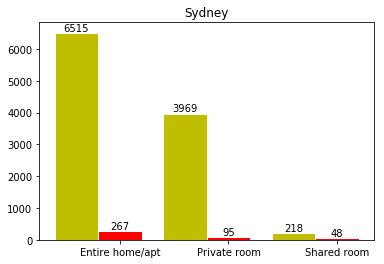

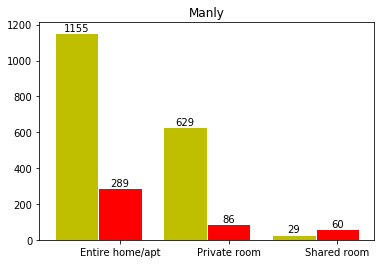

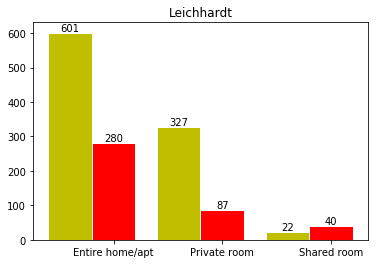

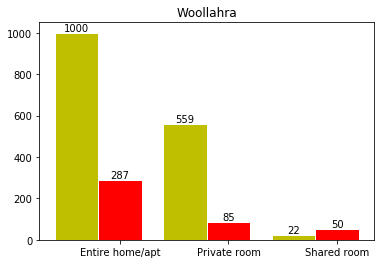

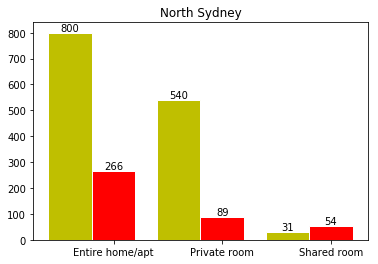

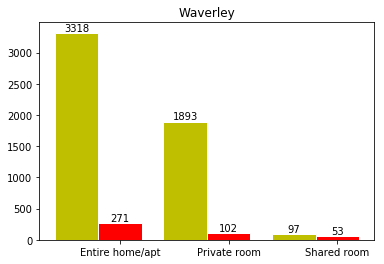

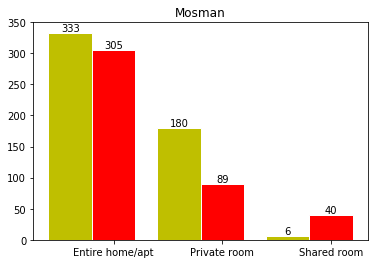

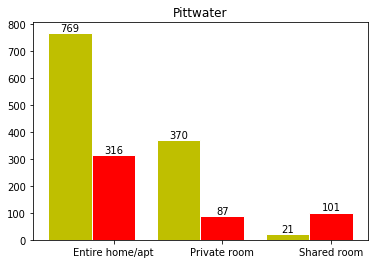

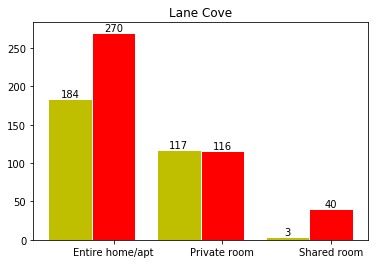

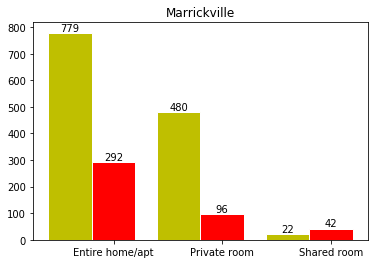

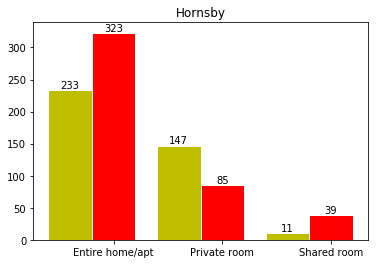

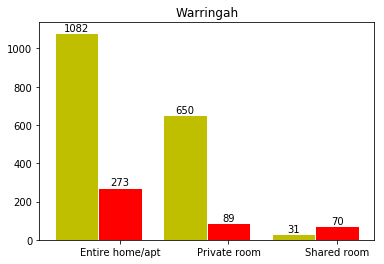

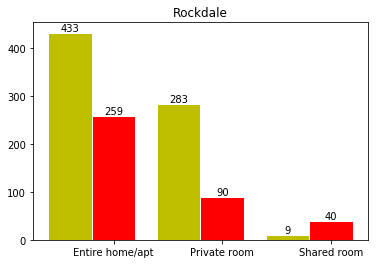

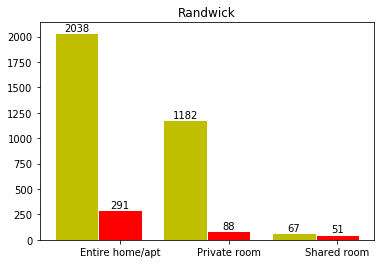

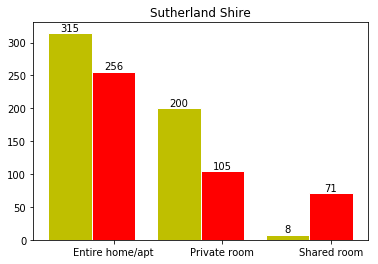

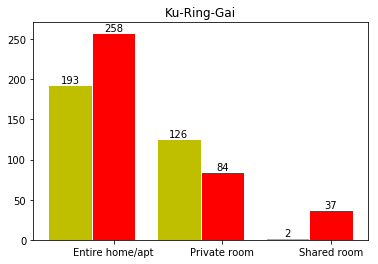

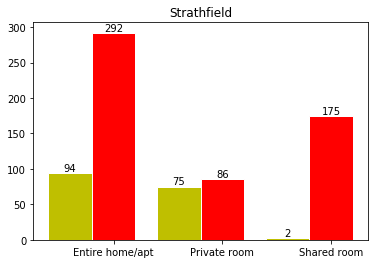

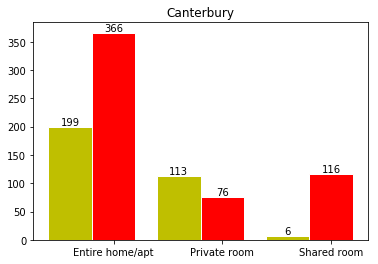

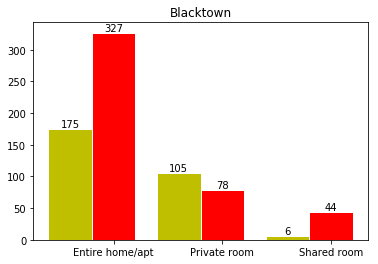

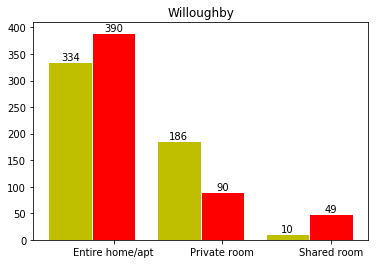

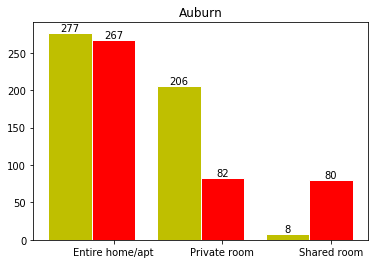

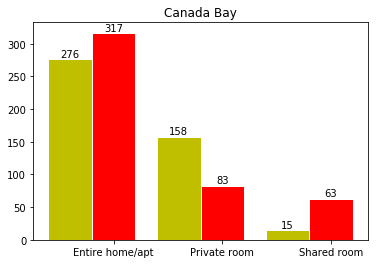

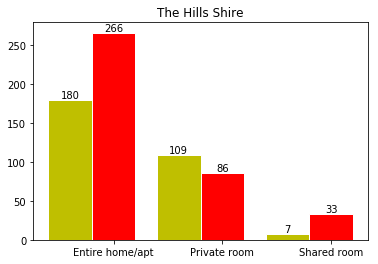

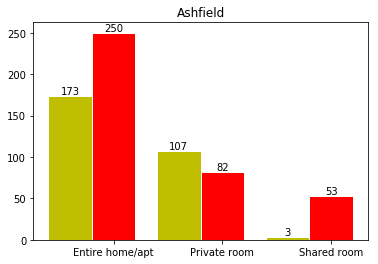

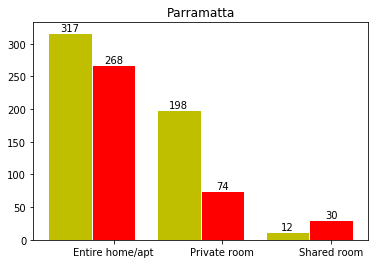

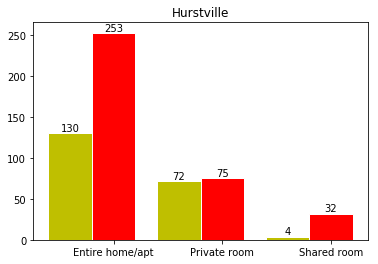

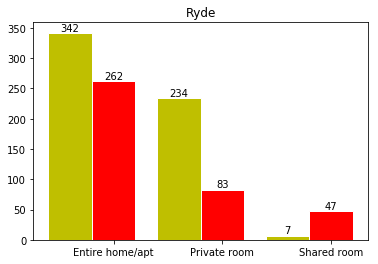

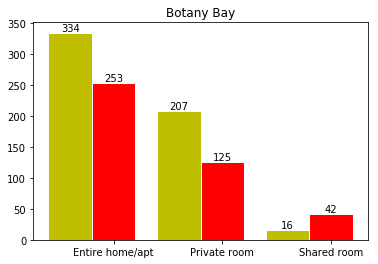

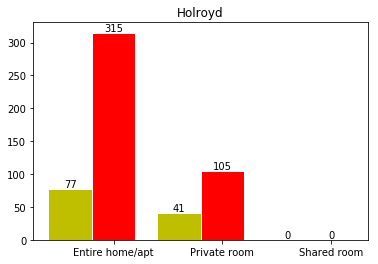

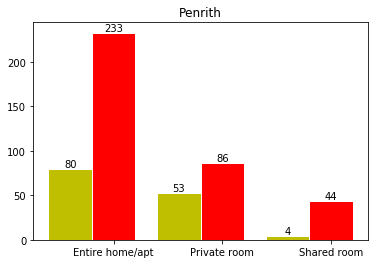

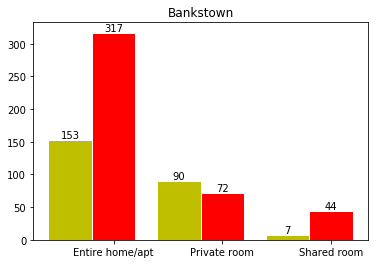

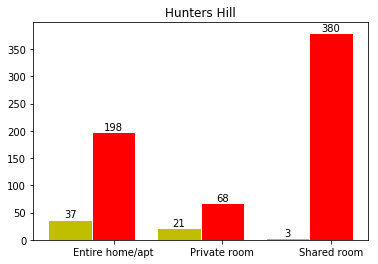

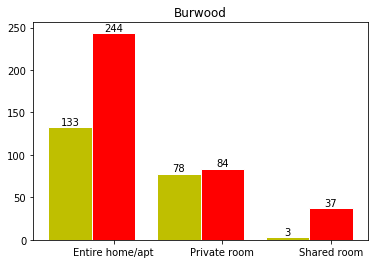

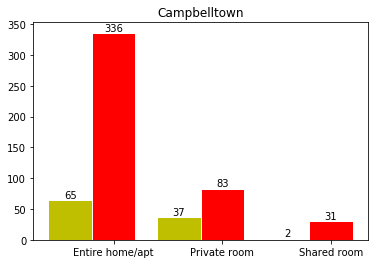

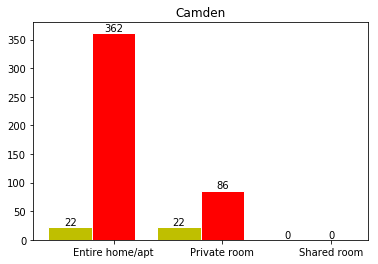

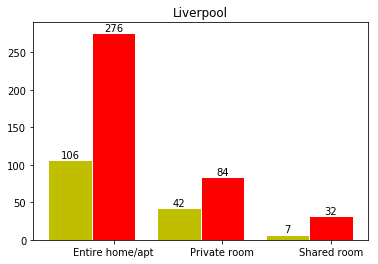

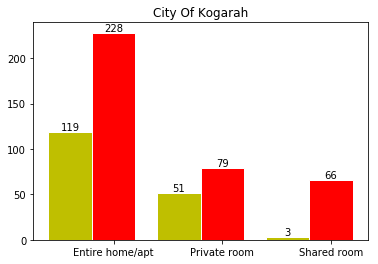

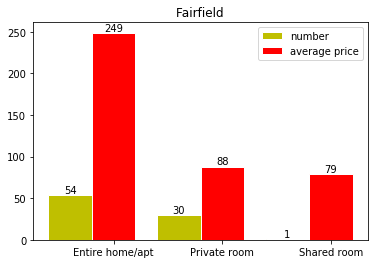

In [14]:
df_need=df[['neighbourhood','room_type','price']]
df_need.dropna()
list_neighbourhood=[]

list_need = np.array(df_need)
list_true=[]
print(list_need.shape[0])
for i in range(list_need.shape[0]): 
    if isinstance(list_need[i,0],str) :
        if  list_need[i,0].replace(' ','').replace('-','').isalpha() :
            if list_need[i,2].isdigit():
                if ('Entire home/apt' in list_need[i,1]) or ('Private room' in list_need[i,1]) or ('Shared room' in list_need[i,1]) :
                    list_true.append(list_need[i])
                    if len(list_neighbourhood)==0:
                        list_neighbourhood.append(list_need[i,0])
                    else:
                        flag=0
                        for j in list_neighbourhood:
                            if list_need[i,0]==j:
                                flag=1
                                break
                        if flag==0:
                            list_neighbourhood.append(list_need[i,0])           

list_true = np.array(list_true)
import matplotlib.pyplot as plt
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
        rect.set_edgecolor('white')
name_list_all_Entire=[]
name_list_all_Private=[]
name_list_all_Shared=[]
num_list_all_Entire=[]
num_list_all_Private=[]
num_list_all_Shared=[]
price_list_all_Entire=[]
price_list_all_Private=[]
price_list_all_Shared=[]
for q in range(len(list_neighbourhood)):
    num1=0
    num2=0
    num3=0
    price1=0
    price2=0
    price3=0
    for i in range(len(list_true)):
        if list_neighbourhood[q] in list_true[i,0]:
            if 'Entire home/apt' in list_need[i,1]:
                num1=num1+1
                price1=price1+int(list_need[i,2])
            if 'Private room' in list_need[i,1]:
                num2=num2+1
                price2=price2+int(list_need[i,2])
            if 'Shared room' in list_need[i,1]:
                num3=num3+1
                price3=price3+int(list_need[i,2])
            
   

    name_list = ['Entire home/apt','Private room','Shared room']
    num_list = [num1,num2,num3]
    name_list_all_Entire.append('Entire home/apt')
    name_list_all_Private.append('Private room')
    name_list_all_Shared.append('Shared room')
    num_list_all_Entire.append(num1)
    num_list_all_Private.append(num2)
    num_list_all_Shared.append(num3)
    
    if num1==0:
        a=0
    else:
        a=int(price1/num1)
    if num2==0:
        b=0
    else:
        b=int(price2/num2)
    if num3==0:
        c=0
    else:
        c=int(price3/num3)
    price_list = [a,b,c]
    price_list_all_Entire.append(a)
    price_list_all_Private.append(b)
    price_list_all_Shared.append(c)
    
    x =list(range(len(num_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    plt.figure(list_neighbourhood[q] )
    plt.title(list_neighbourhood[q] )
    rects1=plt.bar(x, num_list, width=width, label='number',fc = 'y')
    for i in range(len(x)):
        x[i] = x[i] + width
    rects2=plt.bar(x, price_list, width=width, label='average price',tick_label = name_list,fc = 'r')
    add_labels(rects1)
    add_labels(rects2)
    
plt.legend()
plt.show()


## Summary of all areas

0 Sydney
1 Manly
2 Leichhardt
3 Woollahra
4 North Sydney
5 Waverley
6 Mosman
7 Pittwater
8 Lane Cove
9 Marrickville
10 Hornsby
11 Warringah
12 Rockdale
13 Randwick
14 Sutherland Shire
15 Ku-Ring-Gai
16 Strathfield
17 Canterbury
18 Blacktown
19 Willoughby
20 Auburn
21 Canada Bay
22 The Hills Shire
23 Ashfield
24 Parramatta
25 Hurstville
26 Ryde
27 Botany Bay
28 Holroyd
29 Penrith
30 Bankstown
31 Hunters Hill
32 Burwood
33 Campbelltown
34 Camden
35 Liverpool
36 City Of Kogarah
37 Fairfield


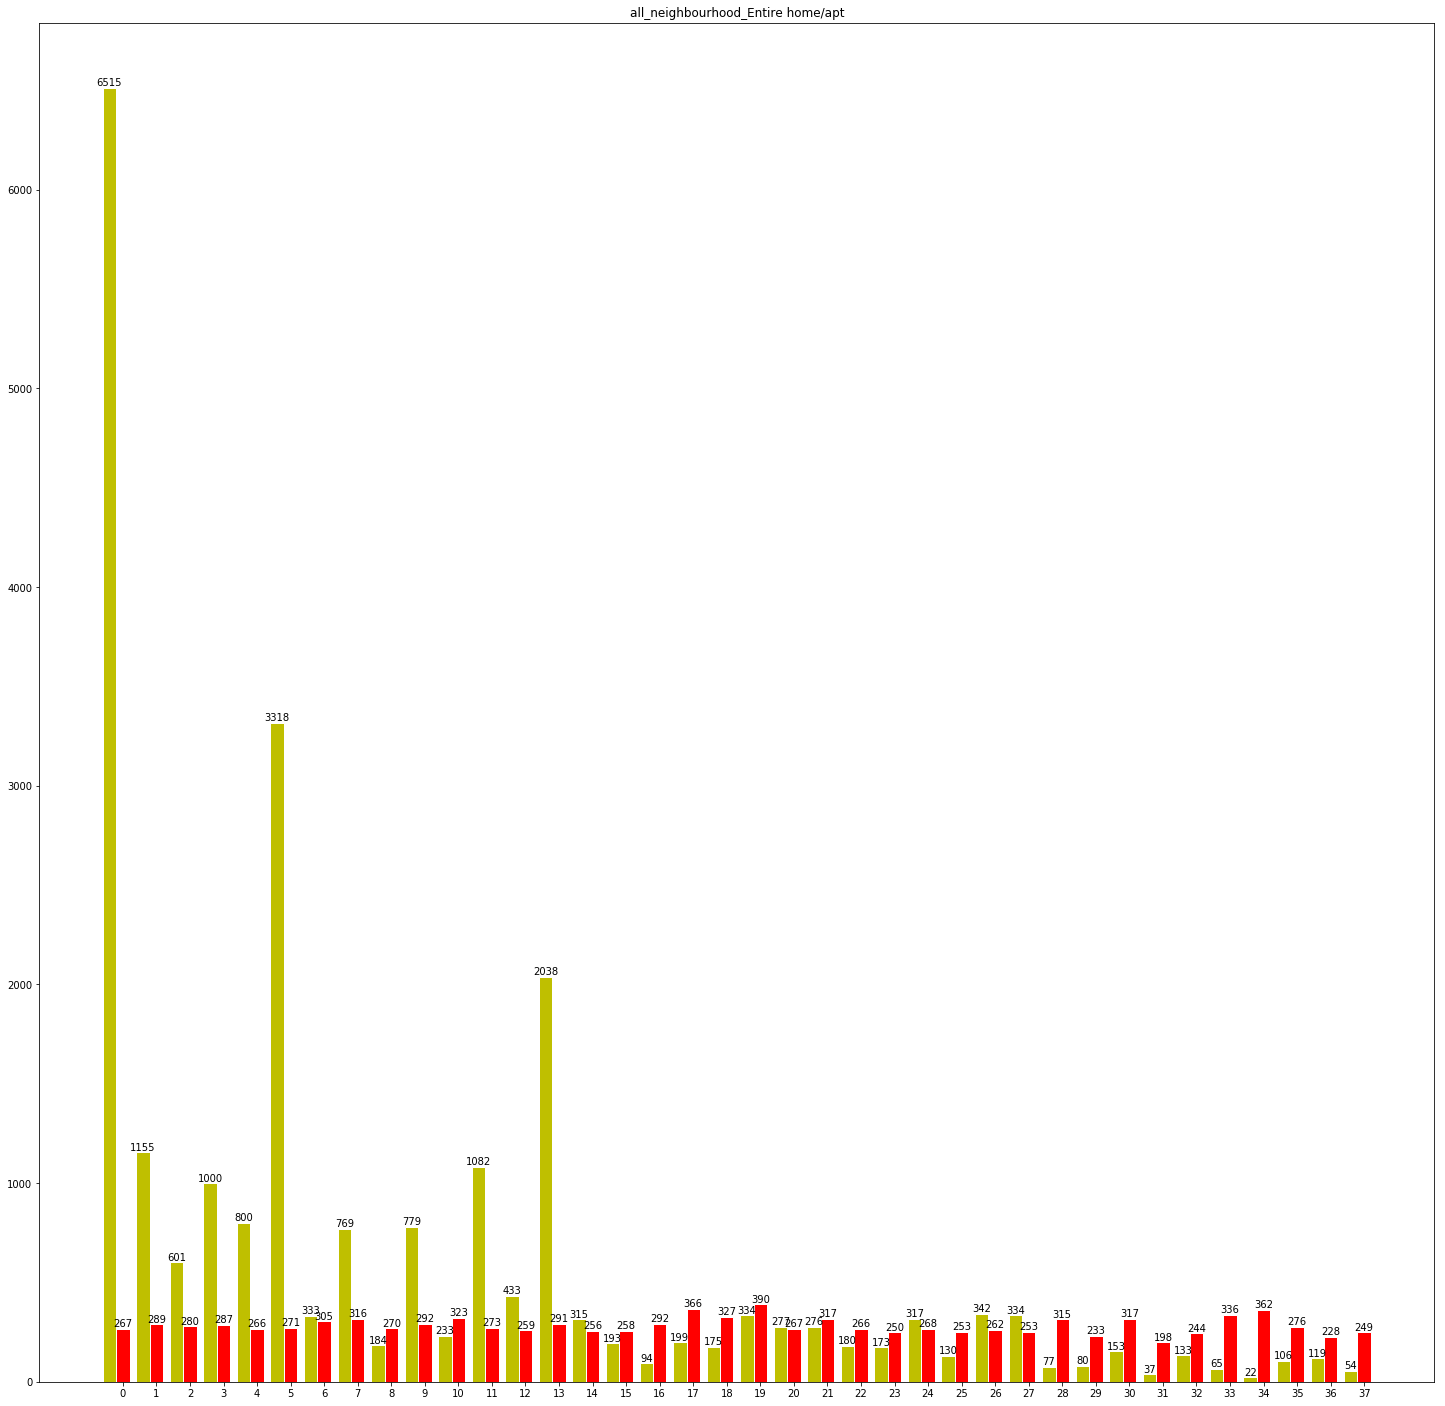

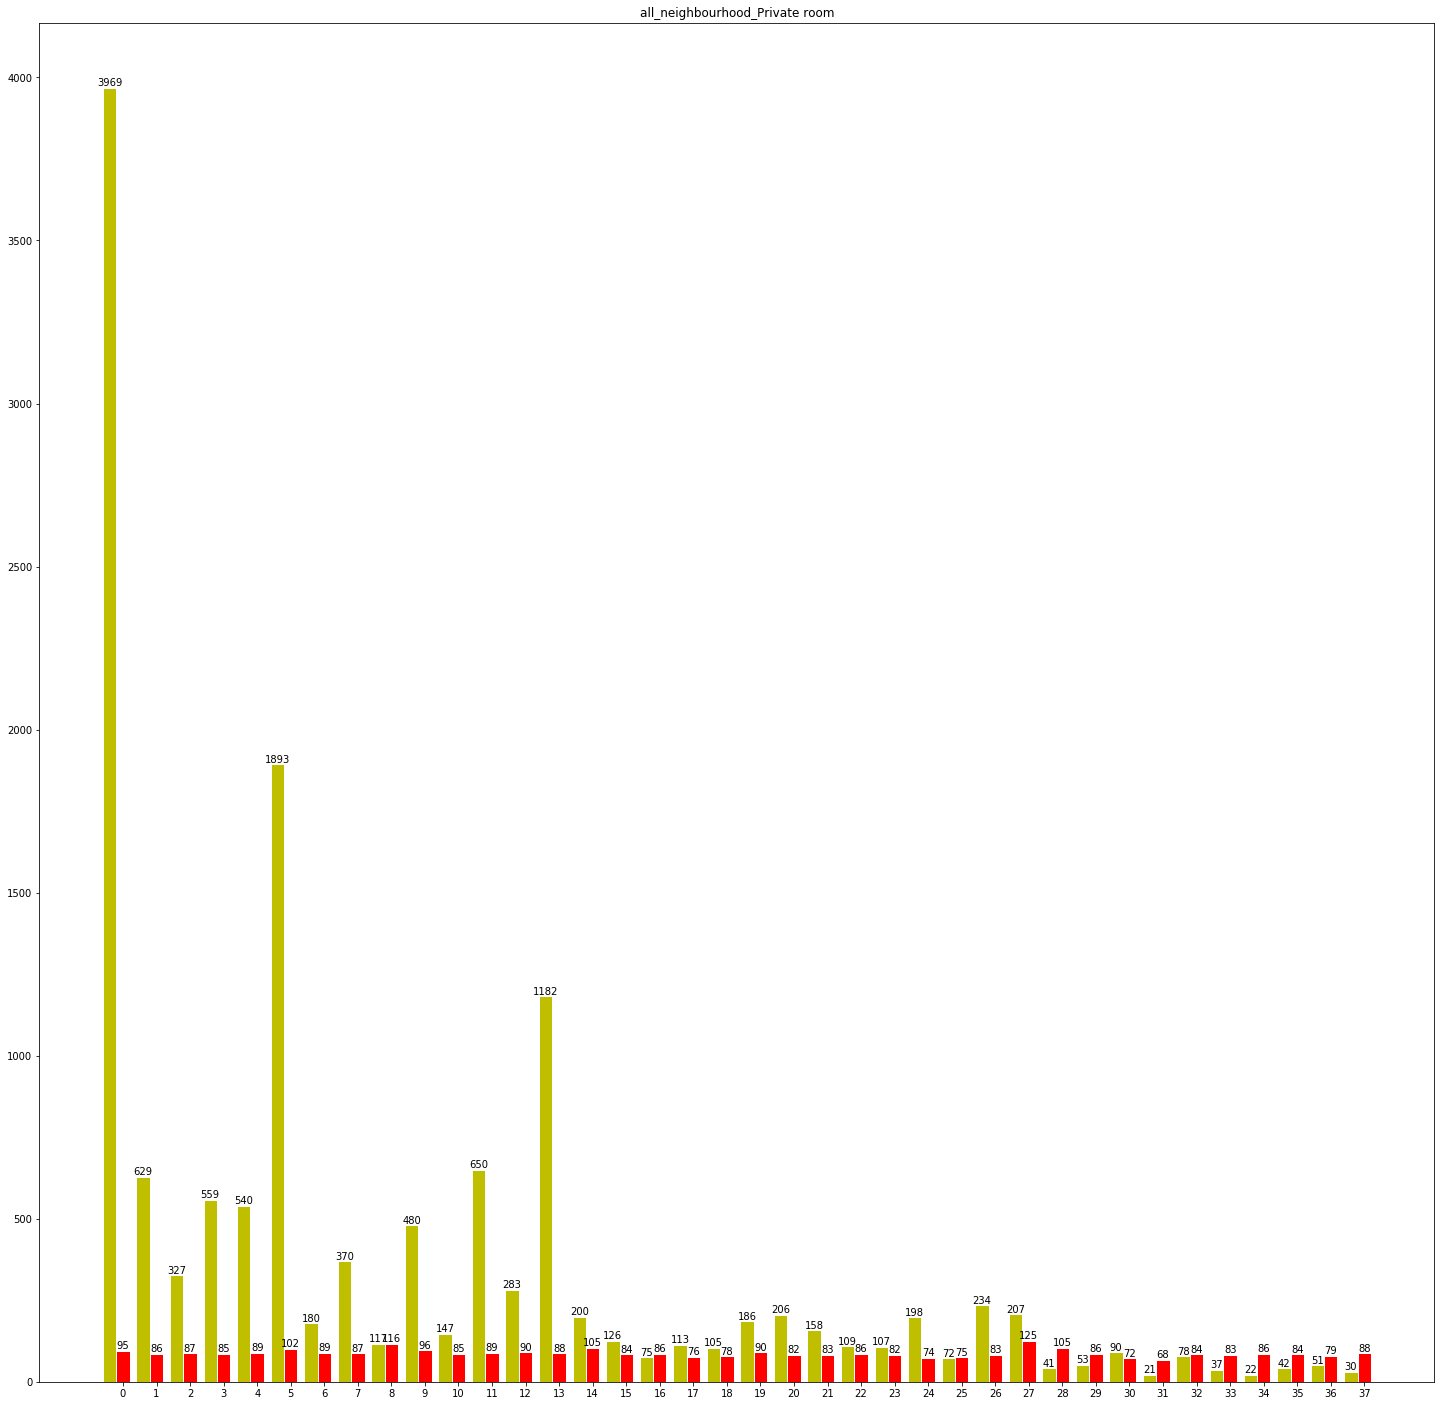

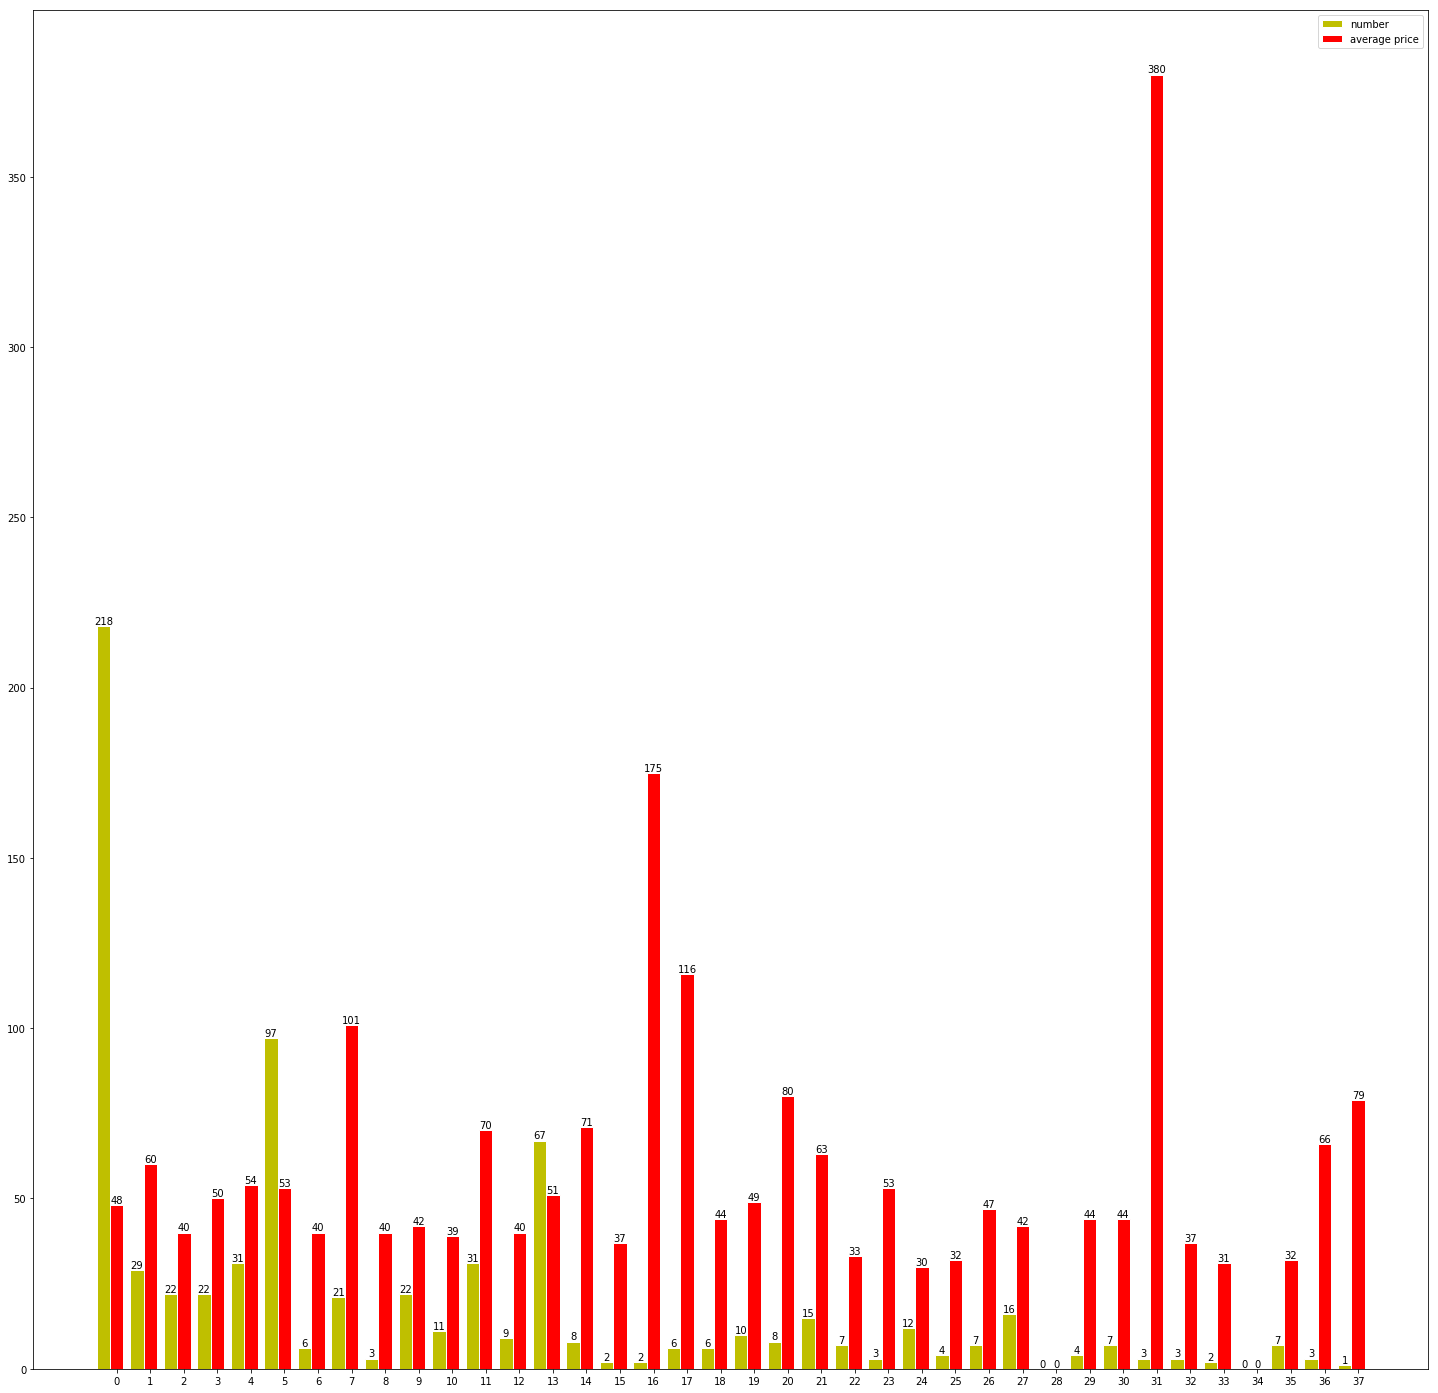

In [15]:
neighbourhood_count=[]
for i in range(len(list_neighbourhood)):
    neighbourhood_count.append(i)
    

#print(name_list_all,num_list_all,price_list_all)#list_neighbourhood
x =list(range(len(num_list_all_Entire)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure('all_neighbourhood_Entire home/apt',figsize=(25,25))
plt.title('all_neighbourhood_Entire home/apt' )
rects1=plt.bar(x, num_list_all_Entire, width=width, label='number',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
rects2=plt.bar(x, price_list_all_Entire, width=width, label='average price',tick_label = neighbourhood_count,fc = 'r')
add_labels(rects1)
add_labels(rects2)

x =list(range(len(num_list_all_Private)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure('all_neighbourhood_Private room',figsize=(25,25))
plt.title('all_neighbourhood_Private room' )
rects3=plt.bar(x, num_list_all_Private, width=width, label='number',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
rects4=plt.bar(x, price_list_all_Private, width=width, label='average price',tick_label = neighbourhood_count,fc = 'r')
add_labels(rects3)
add_labels(rects4)

x =list(range(len(num_list_all_Shared)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure('all_neighbourhood_Shared room',figsize=(25,25))
plt.figure('all_neighbourhood_Shared room')
rects5=plt.bar(x, num_list_all_Shared, width=width, label='number',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
rects6=plt.bar(x, price_list_all_Shared, width=width, label='average price',tick_label = neighbourhood_count,fc = 'r')
add_labels(rects5)
add_labels(rects6)
for i in range(len(neighbourhood_count)):
    print(i,list_neighbourhood[i])

plt.legend()
plt.show()